In [1]:
!pip install racplusplus

  Obtaining dependency information for racplusplus from https://files.pythonhosted.org/packages/7f/eb/c9ef90ac1deda944d054ee39cf296dbb23129972ad617e941308eea0108f/racplusplus-0.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.3 MB/s eta 0:00:0031m22.9 MB/s eta 0:00:01


In [ ]:
 # Generate Noise
import racplusplus
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

np.random.seed(42)
test_points = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200]

distance_threshold = .24

for point_no in test_points:
    sklearn_labels = None
    rac_labels = None

    X = np.random.random((point_no, 2))
    
    rac_time = None
    sklearn_time = None
    if point_no < 13000:
        sklearn_start = time.time()
        model = AgglomerativeClustering(
          linkage="average", connectivity=None, n_clusters=None, distance_threshold=distance_threshold
        )
        model.fit(X)
        labels = model.labels_
        sklearn_time = time.time() - sklearn_start

    rac_start = time.time()
    rac_labels = racplusplus.rac(X, distance_threshold, None, 1000, 8, "euclidean")
    rac_time = time.time() - rac_start

    print(f"RAC: {rac_time}")
    print(f"Sklearn: {sklearn_time}")    


RAC: 0.0007791519165039062Time taken to calculate initial dissimilarities: 0ms
Sum of initial neighbor durations: 0ms

Sklearn: 0.0011458396911621094
RAC: 0.0012049674987792969
Sklearn: 0.0019137859344482422
Sum of merge durations: 0ms
Sum of update neighbor durations: 0ms
Sum of update nn durations: 0ms
Sum of hash durations: 0ms
Average of update percentages: nan
Time taken to calculate RAC: 0ms
Time taken to calculate initial dissimilarities: 0ms
Sum of initial neighbor durations: 0ms
Sum of merge durations: 0ms
Sum of update neighbor durations: 0ms
Sum of update nn durations: 0ms
Sum of hash durations: 0ms
Average of update percentages: nan
Time taken to calculate RAC: 1ms
RAC: 0.004086971282958984
Sklearn: 0.00357818603515625
Time taken to calculate initial dissimilarities: 1ms
Sum of initial neighbor durations: 0ms
Sum of merge durations: 0ms
Sum of update neighbor durations: 0ms
Sum of update nn durations: 0ms
Sum of hash durations: 0ms
Average of update percentages: nan
Time ta

In [27]:
import racplusplus
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

np.random.seed(42)

X = np.random.random((10000, 768))

rac_start = time.time()
rac_labels = racplusplus.rac(X, .24, None, 1000, 8, "cosine")
rac_time = time.time() - rac_start

Time taken to calculate initial dissimilarities: 1351ms
Sum of initial neighbor durations: 0ms
Sum of merge durations: 0ms
Sum of update neighbor durations: 0ms
Sum of update nn durations: 0ms
Sum of hash durations: 0ms
Average of update percentages: nan
Time taken to calculate RAC: 2873ms


In [28]:
rac_time

2.899693012237549

In [29]:
sklearn_start = time.time()
model = AgglomerativeClustering(
          linkage="average", connectivity=None, n_clusters=None, distance_threshold=.24, metric='cosine'
        )
model.fit(X)
labels = model.labels_
time.time() - sklearn_start

41.462695837020874

In [30]:
len(set(labels))

2123

In [31]:
len(set(rac_labels))

2123

## Dimension Benchmarks

In [37]:
import racplusplus
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

np.random.seed(42)

dimensions = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536]
distance_threshold = .24

rac_times = []
sklearn_times = []
for dim in dimensions: 
    sklearn_labels = None
    rac_labels = None

    X = np.random.random((10000, dim))
    
    sklearn_start = time.time()
    model = AgglomerativeClustering(
      linkage="average", connectivity=None, n_clusters=None, distance_threshold=distance_threshold
    )
    model.fit(X)
    labels = model.labels_
    sklearn_times.append(time.time() - sklearn_start)

    rac_start = time.time()
    rac_labels = racplusplus.rac(X, distance_threshold, None, 1000, 8, "cosine")
    rac_times.append(time.time() - rac_start)

    

Time taken to calculate initial dissimilarities: 807ms
Sum of initial neighbor durations: 0ms
Sum of merge durations: 0ms
Sum of update neighbor durations: 0ms
Sum of update nn durations: 0ms
Sum of hash durations: 0ms
Average of update percentages: nan
Time taken to calculate RAC: 2079ms
Time taken to calculate initial dissimilarities: 804ms
Sum of initial neighbor durations: 0ms
Sum of merge durations: 0ms
Sum of update neighbor durations: 0ms
Sum of update nn durations: 0ms
Sum of hash durations: 0ms
Average of update percentages: nan
Time taken to calculate RAC: 2127ms
Time taken to calculate initial dissimilarities: 820ms
Sum of initial neighbor durations: 0ms
Sum of merge durations: 0ms
Sum of update neighbor durations: 0ms
Sum of update nn durations: 0ms
Sum of hash durations: 0ms
Average of update percentages: nan
Time taken to calculate RAC: 2201ms
Time taken to calculate initial dissimilarities: 818ms
Sum of initial neighbor durations: 0ms
Sum of merge durations: 0ms
Sum of u

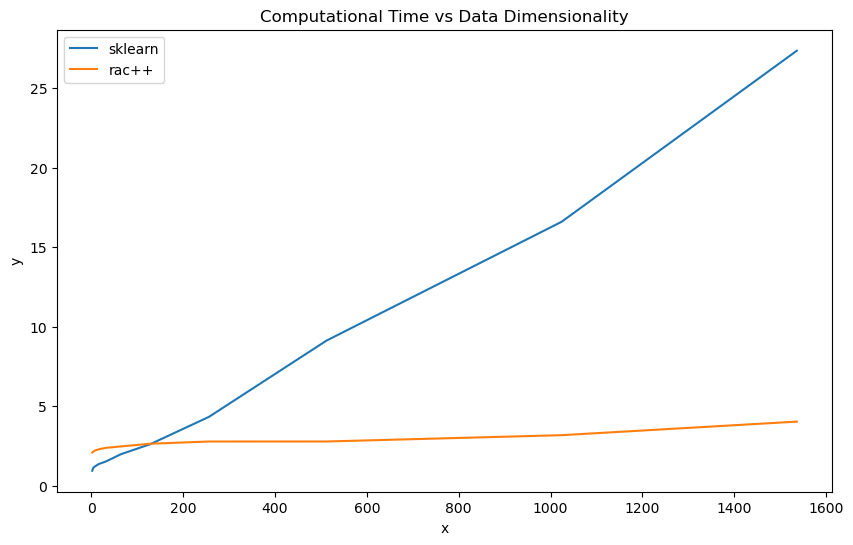

In [40]:
plt.figure(figsize=(10, 6))

# Plot data
plt.plot(dimensions, sklearn_times, label='sklearn')
plt.plot(dimensions, rac_times, label='rac++')

# Add title and labels


plt.title("Computational Time vs Data Dimensionality")
plt.xlabel("x")
plt.ylabel("y")

# Show legend
plt.legend()

# Show the plot
plt.show()

In [36]:
sklearn_times

[26.697892904281616]

In [3]:
import racplusplus



In [2]:
 # Generate Noise
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

np.random.seed(42)
test_points = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200]

distance_threshold = .24

for point_no in test_points:
    sklearn_labels = None
    rac_labels = None

    X = np.random.random((point_no, 25))
    
    rac_time = None
    sklearn_time = None

    knn = kneighbors_graph(X, 30, include_self=False)
    
    if point_no < 13000:
        sklearn_start = time.time()
        model = AgglomerativeClustering(
          linkage="average", connectivity=knn, n_clusters=None, distance_threshold=distance_threshold, metric='cosine'
        )
        model.fit(X)
        labels = model.labels_
        sklearn_time = time.time() - sklearn_start

    rac_start = time.time()
    knn = knn + knn.T
    rac_labels = racplusplus.rac(X, distance_threshold, knn, 1000, 8, "cosine")
    rac_time = time.time() - rac_start

    print(f"RAC: {rac_time}")
    print(f"Sklearn: {sklearn_time}")    

NameError: name 'racplusplus' is not defined

In [24]:
import time

import matplotlib.pyplot as plt
import numpy as np
import racplusplus

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

X = np.random.random((12000, 25))
distance_threshold = .17

knn = kneighbors_graph(X, 30, include_self=False)
symmetric = knn + knn.T
rac_labels = racplusplus.rac(X, distance_threshold, symmetric, 1000, 8, "cosine")

## Computational Scaling

In [43]:
import time

import matplotlib.pyplot as plt
import numpy as np
import racplusplus

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

points = [1000, 2000, 4000, 6000, 10000, 14000, 18000, 22000, 26000, 32000, 64000]
rac_times = []
for point_no in points:
    X = np.random.random((point_no, 25))
    distance_threshold = .17
    
    knn = kneighbors_graph(X, 30, include_self=False)
    symmetric = knn + knn.T
    start = time.time()
    rac_labels = racplusplus.rac(X, distance_threshold, symmetric, 1000, 8, "cosine")
    rac_times.append(time.time() - start)
    

KeyboardInterrupt: 

In [35]:
rac_times

[0.041554927825927734,
 0.05135202407836914,
 0.12568092346191406,
 0.2450869083404541,
 0.5605409145355225,
 1.0138607025146484,
 1.842505931854248,
 2.800041913986206,
 3.687908172607422,
 5.590572118759155,
 22.499607801437378]

In [18]:
import time

import matplotlib.pyplot as plt
import numpy as np
import racplusplus

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

points = [1000, 2000, 4000, 6000, 10000, 14000, 18000, 22000, 26000, 32000]
sklearn_times = []
for point_no in points:
    X = np.random.random((point_no, 25))
    distance_threshold = .17
    print(point_no)
    
    knn = kneighbors_graph(X, 30, include_self=False)
    start = time.time()
    model = AgglomerativeClustering(
      linkage="average", connectivity=knn, n_clusters=None, distance_threshold=distance_threshold, metric='cosine'
    )
    model.fit(X)
    sklearn_times.append(time.time() - start)

1000
2000
4000
6000
10000
14000
18000
22000
26000
32000


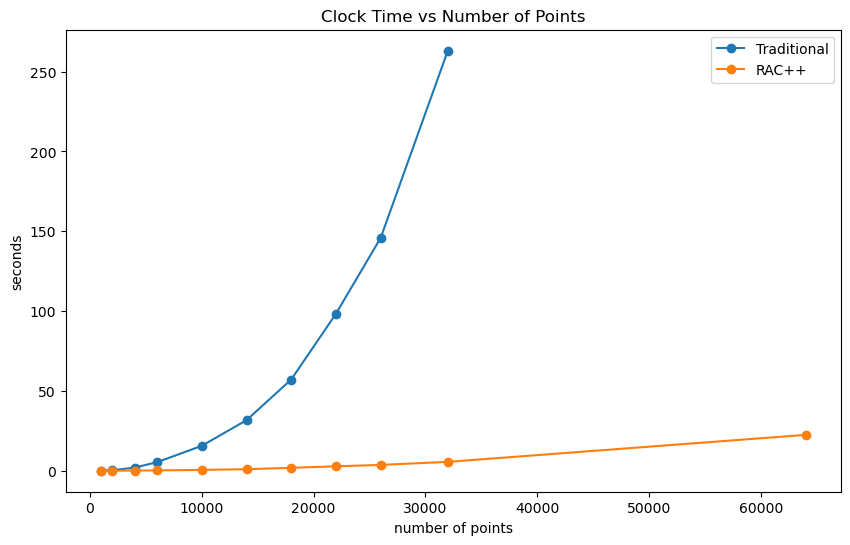

In [42]:
plt.figure(figsize=(10, 6))
points_rac = [1000, 2000, 4000, 6000, 10000, 14000, 18000, 22000, 26000, 32000, 64000]
points_sklearn = [1000, 2000, 4000, 6000, 10000, 14000, 18000, 22000, 26000, 32000]
# Plot data
plt.plot(points_sklearn, sklearn_times, label='Traditional', marker='o')
plt.plot(points_rac, rac_times, label='RAC++', marker='o')

# Add title and labels


plt.title("Clock Time vs Number of Points")
plt.xlabel("number of points")
plt.ylabel("seconds")

# Show legend
plt.legend()

# Show the plot
plt.show()

In [23]:
import time

import matplotlib.pyplot as plt
import numpy as np
import racplusplus

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

points = [1000, 2000, 4000, 6000, 10000, 14000, 18000, 22000, 26000, 32000, 64000]
rac_cpu_times = []
for point_no in points:
    X = np.random.random((point_no, 25))
    distance_threshold = .17
    
    knn = kneighbors_graph(X, 30, include_self=False)
    symmetric = knn + knn.T
    start = time.process_time()
    rac_labels = racplusplus.rac(X, distance_threshold, symmetric, 1000, 8, "cosine")
    rac_cpu_times.append(time.process_time() - start)


In [24]:
rac_cpu_times

[0.07258499999988999,
 0.11269199999992452,
 0.3382010000000264,
 0.5536779999999908,
 1.575038000000177,
 2.222785000000158,
 3.880975000000035,
 5.734820000000127,
 8.530587999999852,
 12.47596499999986,
 50.347352999999885]

In [28]:
import time

import matplotlib.pyplot as plt
import numpy as np
import racplusplus

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

points = [1000, 2000, 4000, 6000, 10000, 14000, 18000, 22000, 26000, 32000]
sklearn_cpu_times = []
for point_no in points:
    X = np.random.random((point_no, 25))
    distance_threshold = .17
    print(point_no)
    
    knn = kneighbors_graph(X, 30, include_self=False)
    start = time.time()
    model = AgglomerativeClustering(
      linkage="average", connectivity=knn, n_clusters=None, distance_threshold=distance_threshold, metric='cosine'
    )
    model.fit(X)
    sklearn_cpu_times.append(time.time() - start)

1000
2000
4000
6000
10000
14000
18000
22000
26000
32000


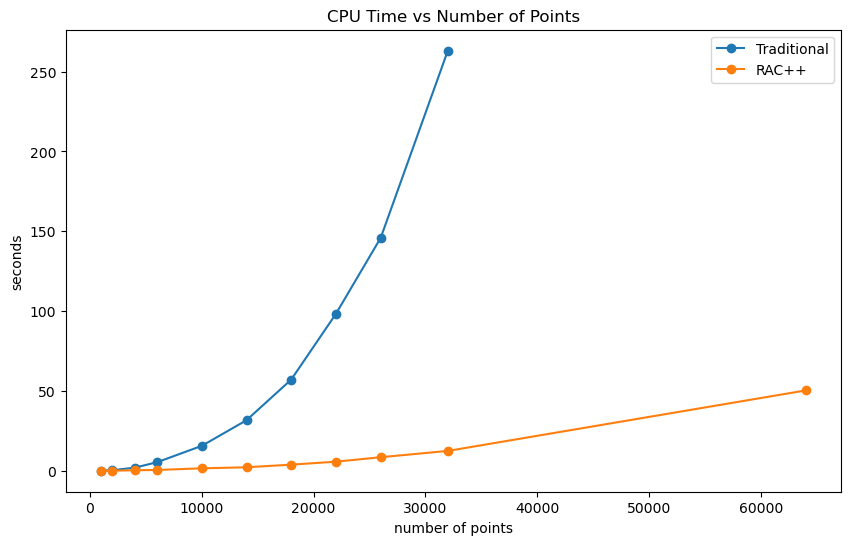

In [41]:
plt.figure(figsize=(10, 6))
points_rac = [1000, 2000, 4000, 6000, 10000, 14000, 18000, 22000, 26000, 32000, 64000]
points_sklearn = [1000, 2000, 4000, 6000, 10000, 14000, 18000, 22000, 26000, 32000]
# Plot data
plt.plot(points_sklearn, sklearn_times, label='Traditional', marker='o')
plt.plot(points_rac, rac_cpu_times, label='RAC++', marker='o')

# Add title and labels


plt.title("CPU Time vs Number of Points")
plt.xlabel("number of points")
plt.ylabel("seconds")

# Show legend
plt.legend()

# Show the plot
plt.show()

## Threaded vs Not

In [37]:
import time

import matplotlib.pyplot as plt
import numpy as np
import racplusplus

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

points = [1000, 2000, 4000, 6000, 10000, 14000, 18000, 22000, 26000, 32000, 64000]
single_rac_times = []
for point_no in points:
    X = np.random.random((point_no, 25))
    distance_threshold = .17
    print(point_no)
    
    knn = kneighbors_graph(X, 30, include_self=False)
    symmetric = knn + knn.T
    start = time.time()
    rac_labels = racplusplus.rac(X, distance_threshold, symmetric, 1000, 1, "cosine")
    single_rac_times.append(time.time() - start)

1000
2000
4000
6000
10000
14000
18000
22000
26000
32000
64000


In [38]:
single_rac_times

[0.0325319766998291,
 0.0643308162689209,
 0.17823195457458496,
 0.34055590629577637,
 0.8070352077484131,
 1.7499730587005615,
 2.7152209281921387,
 4.242125988006592,
 5.951447248458862,
 9.005221128463745,
 36.65319299697876]

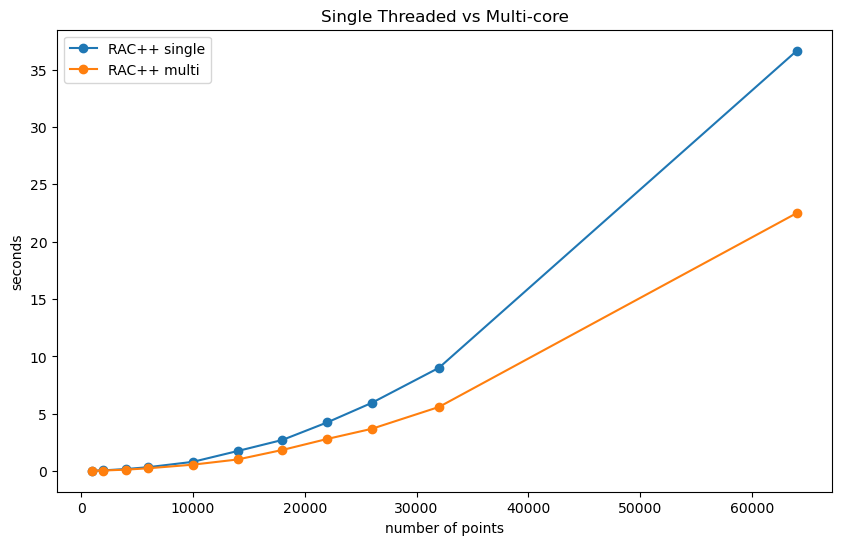

In [40]:
plt.figure(figsize=(10, 6))
points_rac = [1000, 2000, 4000, 6000, 10000, 14000, 18000, 22000, 26000, 32000, 64000]
# Plot data
plt.plot(points_rac, single_rac_times, label='RAC++ single', marker='o')
plt.plot(points_rac, rac_times, label='RAC++ multi', marker='o')

# Add title and labels


plt.title("Single Threaded vs Multi-core")
plt.xlabel("number of points")
plt.ylabel("seconds")

# Show legend
plt.legend()

# Show the plot
plt.show()